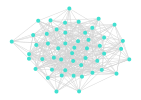

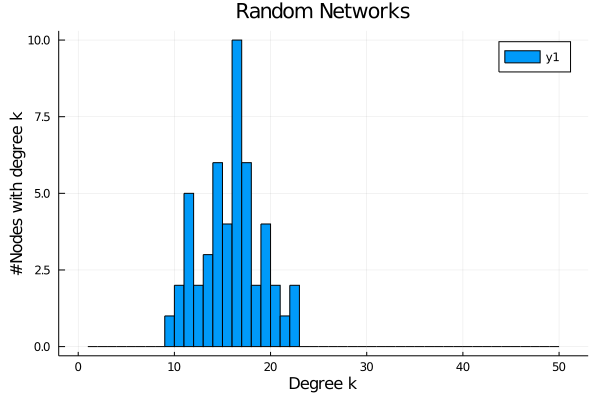

In [20]:
using Plots
using IJulia
using LightGraphs
using GraphPlot

k_distribution = Vector{Int32}()
for i=1:10
    g = erdos_renyi(50, 0.3)
    k_distribution = Vector{Int32}()
    for vertex in vertices(g)
        push!(k_distribution, size(outneighbors(g, vertex), 1))
    end
    IJulia.clear_output(true)
    gplot(g) |> IJulia.display
    p = histogram(k_distribution, bins=1:50) 
    title!("Random Networks")
    xlabel!("Degree k")
    ylabel!("#Nodes with degree k")
    p |> IJulia.display
    sleep(1)
end

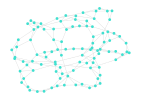

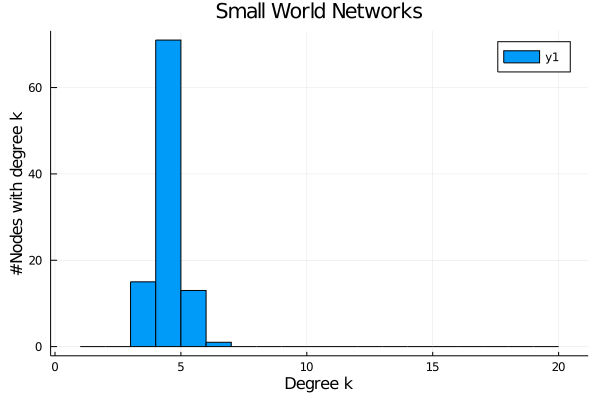

In [21]:
using Plots
using IJulia
using LightGraphs
using GraphPlot

for i=1:10
    g = watts_strogatz(100, 4, 0.1)
    k_distribution = Vector{Int32}()
    for vertex in vertices(g)
        push!(k_distribution, size(outneighbors(g, vertex), 1))
    end
    IJulia.clear_output(true)
    gplot(g) |> IJulia.display
    p = histogram(k_distribution, bins=1:20) 
    title!("Small World Networks")
    xlabel!("Degree k")
    ylabel!("#Nodes with degree k")
    p |> IJulia.display
    sleep(1)
end

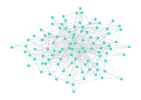

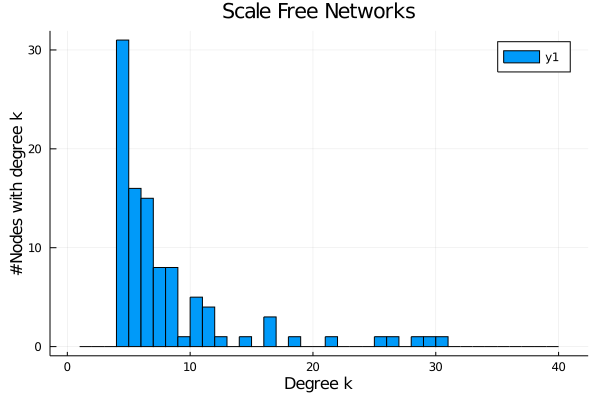

In [32]:
using Plots
using IJulia
using LightGraphs
using GraphPlot

for i=1:10
    g = barabasi_albert(100, 4)
    k_distribution = Vector{Int32}()
    for vertex in vertices(g)
        push!(k_distribution, size(outneighbors(g, vertex), 1))
    end
    IJulia.clear_output(true)
    gplot(g) |> IJulia.display
    p = histogram(k_distribution, bins=1:40) 
    title!("Scale Free Networks")
    xlabel!("Degree k")
    ylabel!("#Nodes with degree k")
    p |> IJulia.display
    sleep(1)
end

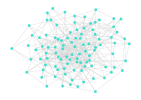

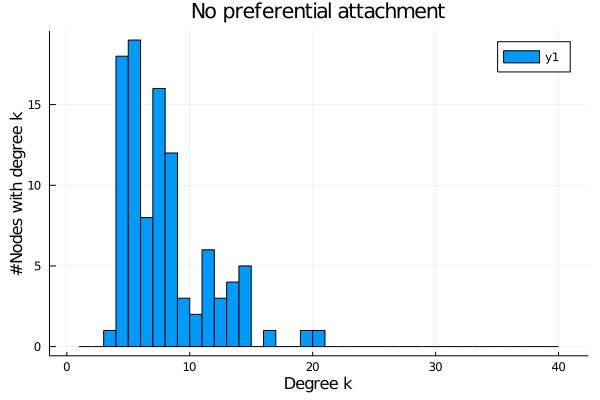

In [31]:
using Plots
using IJulia
using LightGraphs
using GraphPlot

function make_graph_even_distr(size, m)
    g = SimpleGraph(0)
    for i=1:m
        add_vertex!(g)
        for j=1:(i-1)
            add_edge!(g, j, i)
        end
    end
    for i=(m+1):size
        add_vertex!(g)
        for j=1:m
            add_edge!(g, i, rand(1:(i-1)))
        end
    end
    return g
end


for i=1:10
    g = make_graph_even_distr(100, 4)
    k_distribution = Vector{Int32}()
    for vertex in vertices(g)
        push!(k_distribution, size(outneighbors(g, vertex), 1))
    end
    IJulia.clear_output(true)
    gplot(g) |> IJulia.display
    p = histogram(k_distribution, bins=1:40) 
    title!("No preferential attachment")
    xlabel!("Degree k")
    ylabel!("#Nodes with degree k")
    p |> IJulia.display
    sleep(1)
end